In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from IPython.display import display

#from google.colab import drive
url = "https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/D3.csv"
df = pd.read_csv(url)


In [52]:
input_0 = df.values[:, 0]
input_1 = df.values[:, 1]
input_2 = df.values[:, 2]
grandTruth = df.values[:, 3]

print("input_0 = ", input_0[: 5])
print("input_1 = ", input_1[: 5])
print("input_2 = ", input_2[: 5])
print("grandTruth = ", grandTruth[: 5])

sizeZero = len(input_0)
sizeOne = len(input_1)
sizeTwo = len(input_2)
sizeTruth = len(grandTruth)

print("input_0 Size: ", sizeZero)
print("input_1 Size: ", sizeOne)
print("input_2 Size: ", sizeTwo)
print("grandTruth Size: ", sizeTruth)

input_0 =  [0.         0.04040404 0.08080808 0.12121212 0.16161616]
input_1 =  [3.44       0.1349495  0.82989899 1.52484848 2.21979798]
input_2 =  [0.44       0.88848485 1.3369697  1.78545454 2.23393939]
grandTruth =  [4.38754501 2.6796499  2.96848981 3.25406475 3.53637472]
input_0 Size:  100
input_1 Size:  100
input_2 Size:  100
grandTruth Size:  100


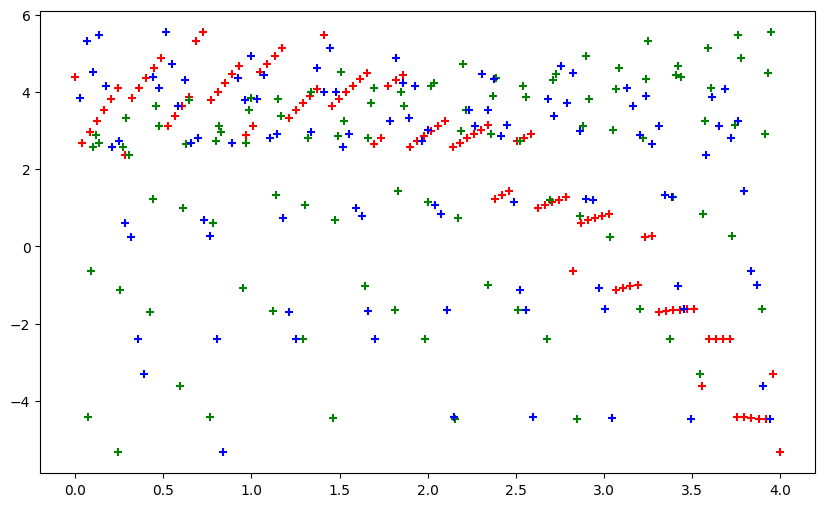

In [53]:
plt.scatter(input_0, grandTruth, color='red', marker='+')
plt.scatter(input_1, grandTruth, color='green', marker='+')
plt.scatter(input_2, grandTruth, color='blue', marker='+')

The graph above shows the different independent variable, each with their own color, plotted against the output dataset.

In [54]:
x_0Ones = np.ones((sizeZero, 1))
x_1Ones = np.ones((sizeOne, 1))
x_2Ones = np.ones((sizeTwo, 1))
truthOnes = np.ones((sizeTruth, 1))

x_0 = df.values[:, 0].reshape(sizeZero, 1)
x_1 = df.values[:, 1].reshape(sizeOne, 1)
x_2 = df.values[:, 2].reshape(sizeTwo, 1)
truth = df.values[:, 3].reshape(sizeTruth, 1)

#combinedInputs used for testing all three variables at once
combinedInputs = np.hstack((truthOnes, x_0, x_1, x_2))

#input_X used for testing individual variables
input_0 = np.hstack((x_0Ones, x_0))
input_1 = np.hstack((x_1Ones, x_1))
input_2 = np.hstack((x_2Ones, x_2))
#grandTruth = np.hstack((truthOnes, truth)) #keeping until sure it's not needed

print("input_0 = ", input_0[: 5])
print("input_1 = ", input_1[: 5])
print("input_2 = ", input_2[: 5])
print("grandTruth = ", grandTruth[: 5])
print("combinedInputs = ", combinedInputs[: 5])

input_0 =  [[1.         0.        ]
 [1.         0.04040404]
 [1.         0.08080808]
 [1.         0.12121212]
 [1.         0.16161616]]
input_1 =  [[1.         3.44      ]
 [1.         0.1349495 ]
 [1.         0.82989899]
 [1.         1.52484848]
 [1.         2.21979798]]
input_2 =  [[1.         0.44      ]
 [1.         0.88848485]
 [1.         1.3369697 ]
 [1.         1.78545454]
 [1.         2.23393939]]
grandTruth =  [4.38754501 2.6796499  2.96848981 3.25406475 3.53637472]
combinedInputs =  [[1.         0.         3.44       0.44      ]
 [1.         0.04040404 0.1349495  0.88848485]
 [1.         0.08080808 0.82989899 1.3369697 ]
 [1.         0.12121212 1.52484848 1.78545454]
 [1.         0.16161616 2.21979798 2.23393939]]


In [55]:
theta_0 = np.zeros(2)
theta_1 = np.zeros(2)
theta_2 = np.zeros(2)
combinedTheta = np.zeros(4)

print("theta_0 = ", theta_0)
print("theta_1 = ", theta_1)
print("theta_3 = ", theta_2)
print("combinedTheta = ", combinedTheta)

theta_0 =  [0. 0.]
theta_1 =  [0. 0.]
theta_3 =  [0. 0.]
combinedTheta =  [0. 0. 0. 0.]


In [56]:
def errorFunction(inputMatrix, outputMatrix, theta):
  currentPrediction = np.dot(inputMatrix, theta)
  error = np.subtract(currentPrediction, outputMatrix)
  squareError = np.square(error)
  meanSquareError = 1/(2*sizeZero) * np.sum(squareError)
  return meanSquareError

In [57]:
def gradientDescent(inputMatrix, outputMatrix, theta, alpha, iterations):
  costHistory = np.zeros(iterations)
  for i in range(iterations):
    currentPrediction = inputMatrix.dot(theta)
    error = np.subtract(currentPrediction, outputMatrix)
    sumDelta = (alpha/sizeZero) * inputMatrix.transpose().dot(error)
    theta -= sumDelta
    costHistory[i] = errorFunction(inputMatrix, outputMatrix, theta)
  return theta, costHistory

For this homework, the range for alpha was given to be 0.1 to 0.01. Ultimately, the choice was made to go with an alpha value of 0.01 as it would allow for a greater overall accuracy. Also, this dataset is not that large, so the total runtime of the model was not really an issue. If the dataset were significantly larger, a larger alpha value might be more appropriate.

The number of iterations within the model is set to be 12,000. This is because 12,000 iterations is large enough to show that the cost function converges while also not being overly excessive.

In [58]:
#-----CHANGE VARIABLES HERE-----
theta_0 = [0., 0.]
theta_1 = [0., 0.]
theta_2 = [0., 0.]
combinedTheta = [0., 0., 0., 0.]
alpha = 0.01
iterations = 3000
#--------------------------------


Here, I will be testing the first independent variable with the ML model to see if there is any correlation between the actual values and the function produced by the ML model.

Final value of theta = [ 5.92043383 -2.03541173]


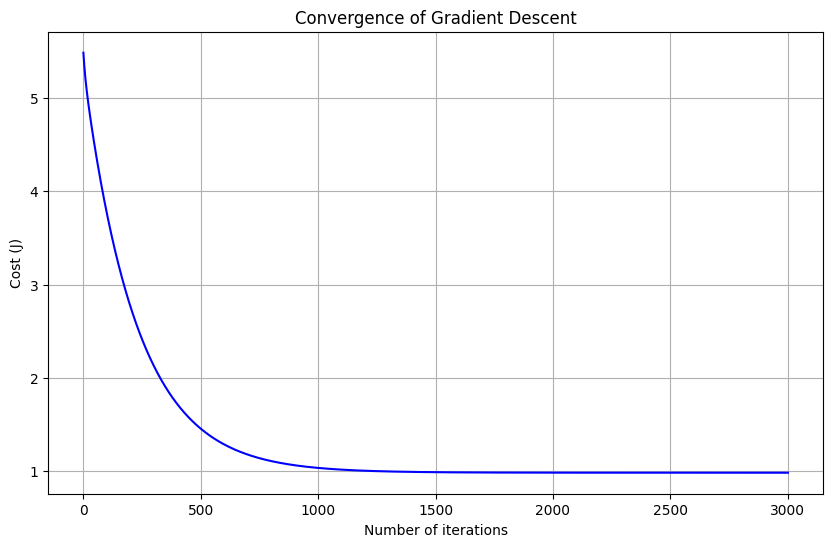

In [59]:
theta_0, costHistory = gradientDescent(input_0, grandTruth, theta_0, alpha, iterations)
print('Final value of theta =', theta_0)
#print('cost_history =', cost_history)
plt.plot(range(1, iterations + 1), costHistory, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Gradient Descent')

# Show the plot
plt.show()

When looking at the cost function for the first independent variable, the graph shows that the value is able to converge around 0. This is significant because it shows that, with only the first variable, this linear regression model is able to predict the outcomes with a high degree of accuracy.

Final value of theta = [0.73547995 0.55783354]


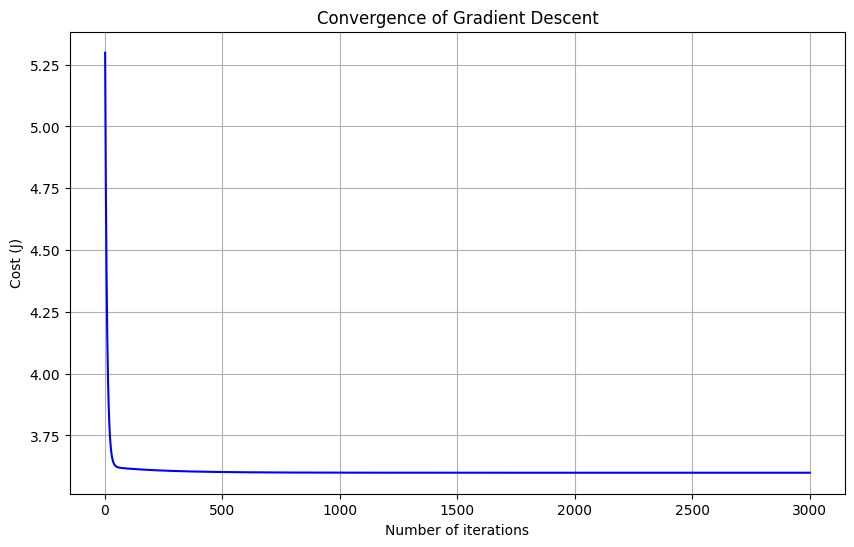

In [60]:
theta_1, costHistory = gradientDescent(input_1, grandTruth, theta_1, alpha, iterations)
print('Final value of theta =', theta_1)
#print('cost_history =', cost_history)
plt.plot(range(1, iterations + 1), costHistory, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Gradient Descent')

# Show the plot
plt.show()

Final value of theta = [ 2.86831421 -0.51925373]


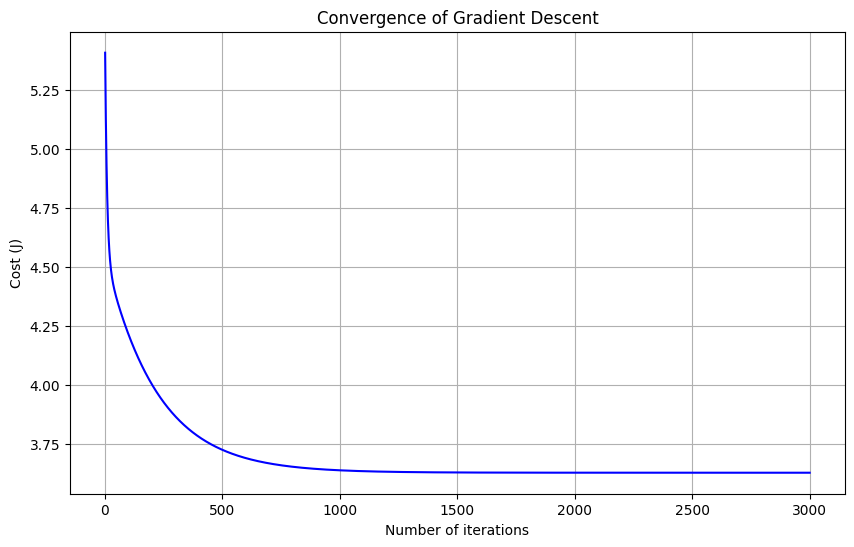

In [61]:
theta_2, costHistory = gradientDescent(input_2, grandTruth, theta_2, alpha, iterations)
print('Final value of theta =', theta_2)
#print('cost_history =', cost_history)
plt.plot(range(1, iterations + 1), costHistory, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Gradient Descent')

# Show the plot
plt.show()

Final value of theta = [ 5.05362928 -1.96691398  0.57561561 -0.22741231]


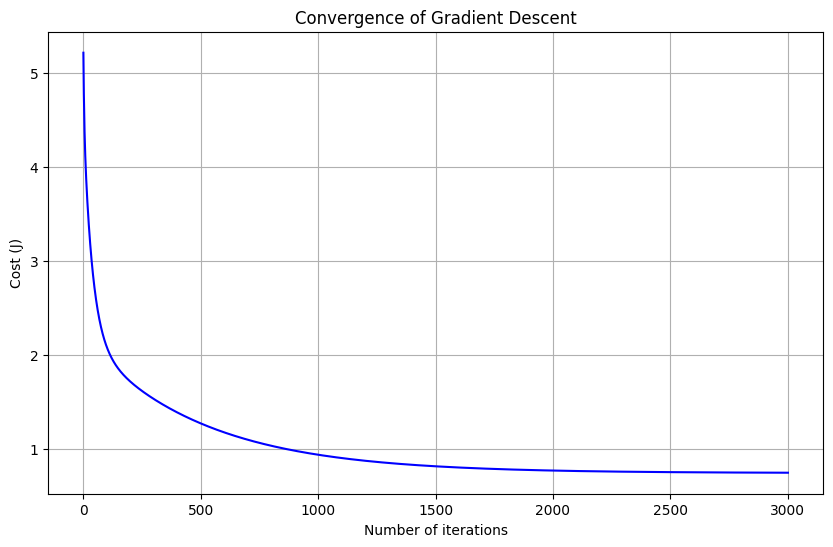

In [62]:
combinedTheta, costHistory = gradientDescent(combinedInputs, grandTruth, combinedTheta, alpha, iterations)
print('Final value of theta =', combinedTheta)
#print('cost_history =', cost_history)
plt.plot(range(1, iterations + 1), costHistory, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Gradient Descent')

# Show the plot
plt.show()